1.

Proszę pobrać plik customers_mall.csv, zawierający informacje o klientach pewnego centrum handlowego. Pierwsza kolumna przedstawia ich zarobki (w tysiącach), w drugiej zaś znajduje się punktowa ocena wydatków (od 0 do 100) każdego z klientów.  Proszę dokonać klasteryzacji zbioru z użyciem algorytmu k-means. Uzyskane wyniki należy zwizualizować, ocenić i opisać. Wskazane jest zarekomendowanie odpowiedniej ilości klastrów.

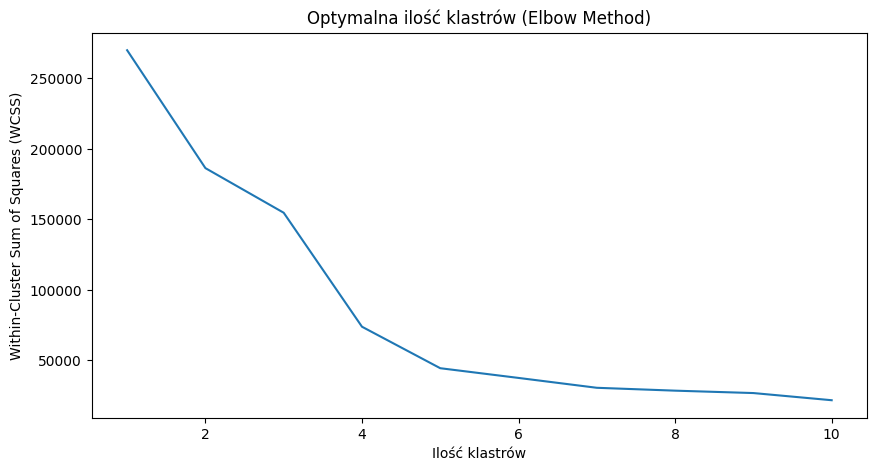

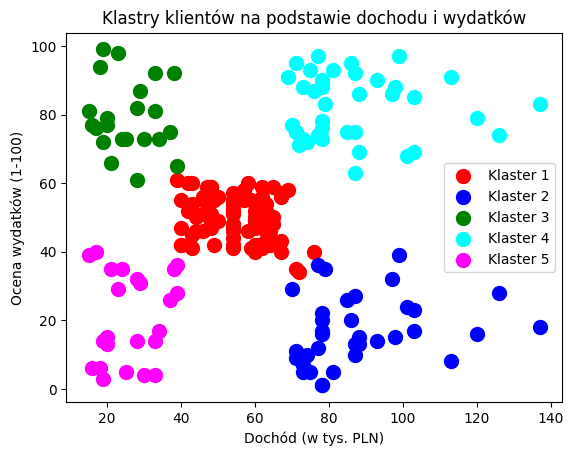

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('customers_mall.csv')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Optymalna ilość klastrów (Elbow Method)')
plt.xlabel('Ilość klastrów')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
y_kmeans = kmeans.fit_predict(df)
plt.scatter(df.values[y_kmeans == 0, 0], df.values[y_kmeans == 0, 1], s=100, c='red', label='Klaster 1')
plt.scatter(df.values[y_kmeans == 1, 0], df.values[y_kmeans == 1, 1], s=100, c='blue', label='Klaster 2')
plt.scatter(df.values[y_kmeans == 2, 0], df.values[y_kmeans == 2, 1], s=100, c='green', label='Klaster 3')
plt.scatter(df.values[y_kmeans == 3, 0], df.values[y_kmeans == 3, 1], s=100, c='cyan', label='Klaster 4')
plt.scatter(df.values[y_kmeans == 4, 0], df.values[y_kmeans == 4, 1], s=100, c='magenta', label='Klaster 5')
plt.title('Klastry klientów na podstawie dochodu i wydatków')
plt.xlabel('Dochód (w tys. PLN)')
plt.ylabel('Ocena wydatków (1-100)')
plt.legend()
plt.show()

**Wnioski:**

2.

W pliku planets.csv mają państwo zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html). Proszę dokonać klasteryzacji tego zbioru kilkoma sposobami, ocenić wyniki za pomocą odpowiednich metryk, wybrać dowolny z wyników i jego rezultaty (czym się charakteryzują klastry).

Poniżej znajduje się opis kolumn do zestawu danych:


         pl_name:        Planet Name,
         pl_orbper:      Orbital Period [days]',
         pl_orbsmax:     Orbit Semi-Major Axis [au]),
         pl_rade:        Planet Radius [Earth Radius],
         pl_masse:       Planet Mass [Earth Mass],
         pl_orbeccen:    Eccentricity,
         pl_eqt:         Equilibrium Temperature [K],
         st_teff:        Stellar Effective Temperature [K],
         st_mass:        Stellar Mass [Solar mass],
         sy_dist:        Distance [pc]


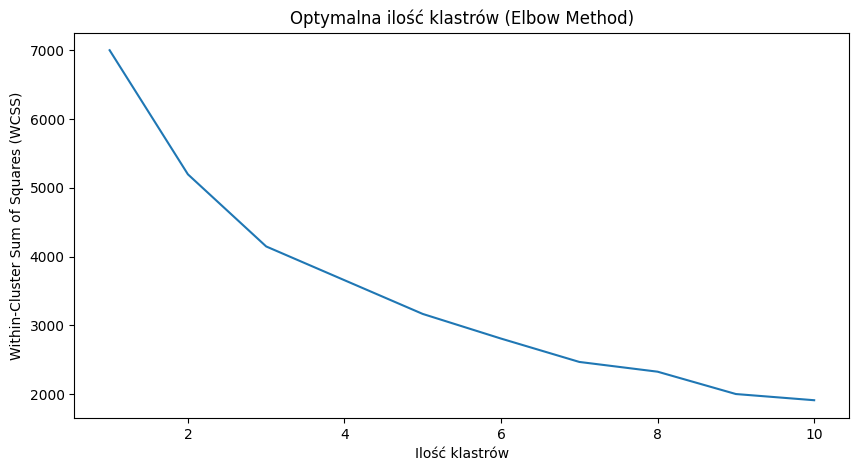

KMeans Silhouette Score:  0.31023059380845436
Agglomerative Clustering Silhouette Score:  0.28848231643988387
DBSCAN Silhouette Score:  -0.28305353092025043
KMeans:
           pl_orbper  pl_orbsmax    pl_rade     pl_masse  pl_orbeccen  \
cluster                                                                 
0          24.894066    0.112927   5.217645   118.039566     0.092082   
1           6.023869    0.060065  14.001382   567.899476     0.076648   
2        3650.000000    4.500000  12.442000  4131.790000     0.000000   

              pl_eqt      st_teff   st_mass     sy_dist  cluster  
cluster                                                           
0         829.681690  4776.285070  0.759577  152.972810      0.0  
1        1582.895735  6042.498175  1.214123  490.764815      1.0  
2         183.000000  4898.000000  0.900000  551.886000      2.0  


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

df = pd.read_csv('planets.csv')
df = df.dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Optymalna ilość klastrów (Elbow Method)')
plt.xlabel('Ilość klastrów')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=1)
pred_y_kmeans = kmeans.fit_predict(df_scaled)
print('KMeans Silhouette Score: ', silhouette_score(df_scaled, pred_y_kmeans))
agg_clustering = AgglomerativeClustering(n_clusters=3)
pred_y_agg = agg_clustering.fit_predict(df_scaled)
print('Agglomerative Clustering Silhouette Score: ', silhouette_score(df_scaled, pred_y_agg))
dbscan = DBSCAN(eps=0.5)
pred_y_dbscan = dbscan.fit_predict(df_scaled)
print('DBSCAN Silhouette Score: ', silhouette_score(df_scaled, pred_y_dbscan))
print('KMeans:')
df['cluster'] = pred_y_kmeans
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df.groupby('cluster')[numeric_cols].mean())

**Wnioski:**

3.

Z użyciem algorytmu fuzzy clustering proszę zaproponować model dla podanego powyżej zestawu danych. Do uczenia należy wybrać wyłącznie połowę jego kolumn.

In [30]:
import skfuzzy as fuzz

cols = df_scaled.shape[1] // 2
df_half = df_scaled[:, :cols]
cntr, u_orig, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_half.T, 3, 2, error=0.005, maxiter=1000)
cluster_membership = np.argmax(u_orig, axis=0)
print('Fuzzy C-Means FPC: ', fpc)
df['cluster'] = cluster_membership
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df.groupby('cluster')[numeric_cols].mean())

Fuzzy C-Means FPC:  0.804443891145122
          pl_orbper  pl_orbsmax    pl_rade     pl_masse  pl_orbeccen  \
cluster                                                                
0         23.590078    0.112332   3.078908    24.305628     0.084489   
1          7.079236    0.062095  14.032827   382.199098     0.073902   
2        137.693864    0.260993  13.131811  2814.098066     0.196382   

              pl_eqt      st_teff   st_mass     sy_dist  cluster  
cluster                                                           
0         862.200704  4840.517958  0.780106  152.933941      0.0  
1        1457.794311  5795.814726  1.126740  435.755545      1.0  
2        1395.270270  6135.648649  1.255135  523.958432      2.0  


**Wnioski:**

4.

Dla zbioru danych circle.csv proszę, wykorzystując wszystkie (za wyjątkiem c-means) poznane do tej pory algorytmy klasteryzacyjne, podjąć kilka prób dopasowania jak najlepszego modelu, za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk. Który z algorytmów najlepiej radzi sobie z takim układem danych i dlaczego? Proszę przedstawić wyniki również w formie odpowiednich wizualizacji.

KMeans Silhouette Score:  0.3531630369049539
Agglomerative Clustering Silhouette Score:  0.3386467282122495
Wszystkie punkty zostały przypisane do jednego klastra


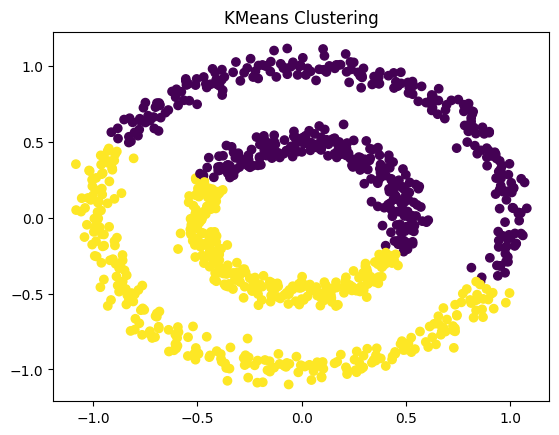

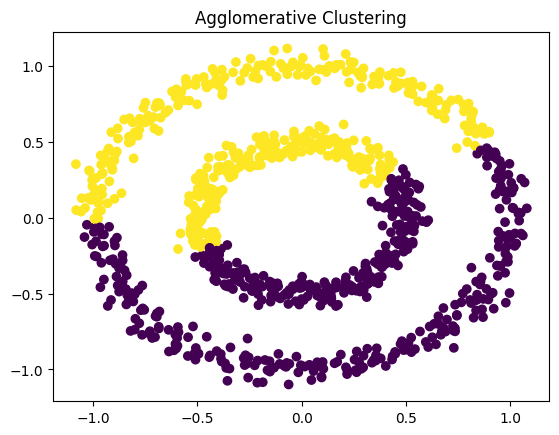

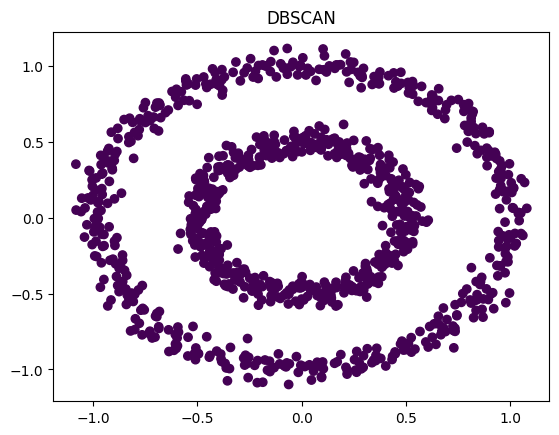

In [33]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv('circle.csv')
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y_kmeans = kmeans.fit_predict(df)
print('KMeans Silhouette Score: ', silhouette_score(df, pred_y_kmeans))
agg_clustering = AgglomerativeClustering(n_clusters=2)
pred_y_agg = agg_clustering.fit_predict(df)
print('Agglomerative Clustering Silhouette Score: ', silhouette_score(df, pred_y_agg))
dbscan = DBSCAN(eps=0.5)
pred_y_dbscan = dbscan.fit_predict(df)
if len(set(pred_y_dbscan)) > 1:
    print('DBSCAN Silhouette Score: ', silhouette_score(df, pred_y_dbscan))
else:
    print('Wszystkie punkty zostały przypisane do jednego klastra')
plt.scatter(df['x1'], df['x2'], c=pred_y_kmeans)
plt.title('KMeans Clustering')
plt.show()
plt.scatter(df['x1'], df['x2'], c=pred_y_agg)
plt.title('Agglomerative Clustering')
plt.show()
plt.scatter(df['x1'], df['x2'], c=pred_y_dbscan)
plt.title('DBSCAN')
plt.show()

**Wnioski:**